In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Load data 
data1 = pd.read_csv('D:/Week10/data/Copy of BrentOilPrices.csv')
data2 = pd.read_csv('D:/Week10/data/Data_Africa.csv')
data3 = pd.read_csv('D:/Week10/data/population_total_long.csv')

In [66]:
# Displaying the first few rows of all three DataFrames
print("DataFrame 1:")
print(data1.head())
print("\nDataFrame 2:")
print(data2.head())
print("\nDataFrame 3:")
print(data3.head())

DataFrame 1:
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63

DataFrame 2:
   ID  Year Country    Continent  Population      GDP (USD)
0   1  2000  Uganda  East Africa     23303189  6.193247e+09
1   2  2001  Uganda  East Africa     24022603  5.840504e+09
2   3  2002  Uganda  East Africa     24781316  5.840504e+09
3   4  2003  Uganda  East Africa     25577246  6.606884e+09
4   5  2004  Uganda  East Africa     26403221  7.939488e+09

DataFrame 3:
  Country Name  Year    Count
0        Aruba  1960    54211
1  Afghanistan  1960  8996973
2       Angola  1960  5454933
3      Albania  1960  1608800
4      Andorra  1960    13411


In [67]:
# Check for missing values
print("Missing values in Brent Oil Prices:")
print(data1.isnull().sum(), "\n")

print("Missing values in Africa Data:")
print(data2.isnull().sum(), "\n")

print("Missing values in Population Data:")
print(data3.isnull().sum(), "\n")

# Check data types
print("Data types in Brent Oil Prices:")
print(data1.dtypes, "\n")

print("Data types in Africa Data:")
print(data2.dtypes, "\n")

print("Data types in Population Data:")
print(data3.dtypes, "\n")

# Convert date column in data1 (if applicable)
if 'Date' in data1.columns:
    data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')

# Review the cleaned data types
print("Updated data types in Brent Oil Prices:")
print(data1.dtypes, "\n")

Missing values in Brent Oil Prices:
Date     0
Price    0
dtype: int64 

Missing values in Africa Data:
ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64 

Missing values in Population Data:
Country Name    0
Year            0
Count           0
dtype: int64 

Data types in Brent Oil Prices:
Date      object
Price    float64
dtype: object 

Data types in Africa Data:
ID               int64
Year             int64
Country         object
Continent       object
Population       int64
GDP (USD)      float64
dtype: object 

Data types in Population Data:
Country Name    object
Year             int64
Count            int64
dtype: object 



C:\Users\medha\AppData\Local\Temp\ipykernel_2540\464919599.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')


Updated data types in Brent Oil Prices:
Date     datetime64[ns]
Price           float64
dtype: object 



In [68]:
# Display rows with missing GDP values
missing_gdp = data2[data2['GDP (USD)'].isnull()]
print("Rows with missing GDP values:")
print(missing_gdp)

Rows with missing GDP values:
        ID  Year                                       Country    Continent  \
207    208  2000                                       Mayotte  East Africa   
208    209  2001                                       Mayotte  East Africa   
209    210  2002                                       Mayotte  East Africa   
210    211  2003                                       Mayotte  East Africa   
211    212  2004                                       Mayotte  East Africa   
...    ...   ...                                           ...          ...   
1260  1261  2018  Saint Helena, Ascension and Tristan da Cunha  West Africa   
1261  1262  2019  Saint Helena, Ascension and Tristan da Cunha  West Africa   
1262  1263  2020  Saint Helena, Ascension and Tristan da Cunha  West Africa   
1263  1264  2021  Saint Helena, Ascension and Tristan da Cunha  West Africa   
1264  1265  2022  Saint Helena, Ascension and Tristan da Cunha  West Africa   

      Population   GD

In [69]:
# Drop rows with missing GDP values
data2_cleaned = data2.dropna(subset=['GDP (USD)'])

print("Missing values in Africa Data after dropping rows:")
print(data2_cleaned.isnull().sum())

Missing values in Africa Data after dropping rows:
ID             0
Year           0
Country        0
Continent      0
Population     0
GDP (USD)      0
dtype: int64


In [70]:
# Extract the Year from the Date in the Brent Oil Prices DataFrame
data1['Year'] = data1['Date'].dt.year

# Merge DataFrames on Year
merged_df = data1.merge(data2, on='Year', how='left').merge(data3, on='Year', how='left')

print("Merged DataFrame:")
print(merged_df.head(), "\n")

Merged DataFrame:
        Date  Price  Year  ID Country Continent  Population   GDP (USD)  \
0 1987-05-20  18.63  1987 NaN     NaN       NaN          NaN        NaN   
1 1987-05-20  18.63  1987 NaN     NaN       NaN          NaN        NaN   
2 1987-05-20  18.63  1987 NaN     NaN       NaN          NaN        NaN   
3 1987-05-20  18.63  1987 NaN     NaN       NaN          NaN        NaN   
4 1987-05-20  18.63  1987 NaN     NaN       NaN          NaN        NaN   

  Country Name       Count  
0        Aruba     61833.0  
1  Afghanistan  11604534.0  
2       Angola  10689250.0  
3      Albania   3083605.0  
4      Andorra     48455.0   



In [71]:
# Check unique years in each DataFrame
print("Unique years in Brent Oil Prices:")
print(data1['Year'].unique())

print("\nUnique years in Africa Data:")
print(data2['Year'].unique())

print("\nUnique years in Population Data:")
print(data3['Year'].unique())

Unique years in Brent Oil Prices:
[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]

Unique years in Africa Data:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]

Unique years in Population Data:
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017]


In [72]:
# Filter the Brent Oil Prices DataFrame for years 2000 and above
data1_filtered = data1[data1['Year'] >= 2000]

# Verify the filtering
print("Filtered Brent Oil Prices DataFrame:")
print(data1_filtered.head(), "\n")

# Filter the Africa Data (this is already in the correct range, but good to verify)
data2_filtered = data2[data2['Year'] >= 2000]

# Verify the filtering
print("Filtered Africa Data:")
print(data2_filtered.head(), "\n")

Filtered Brent Oil Prices DataFrame:
           Date  Price  Year
3200 2000-01-04  23.95  2000
3201 2000-01-05  23.72  2000
3202 2000-01-06  23.55  2000
3203 2000-01-07  23.35  2000
3204 2000-01-10  22.77  2000 

Filtered Africa Data:
   ID  Year Country    Continent  Population      GDP (USD)
0   1  2000  Uganda  East Africa     23303189  6.193247e+09
1   2  2001  Uganda  East Africa     24022603  5.840504e+09
2   3  2002  Uganda  East Africa     24781316  5.840504e+09
3   4  2003  Uganda  East Africa     25577246  6.606884e+09
4   5  2004  Uganda  East Africa     26403221  7.939488e+09 



In [73]:
# Merge the filtered Brent Oil Prices DataFrame with the Africa Data
merged_df = data1_filtered.merge(data2_filtered, on='Year', how='left').merge(data3, on='Year', how='left')

print("Merged DataFrame after filtering for common years:")
print(merged_df.head(), "\n")

Merged DataFrame after filtering for common years:
        Date  Price  Year  ID Country    Continent  Population      GDP (USD)  \
0 2000-01-04  23.95  2000   1  Uganda  East Africa     23303189  6.193247e+09   
1 2000-01-04  23.95  2000   1  Uganda  East Africa     23303189  6.193247e+09   
2 2000-01-04  23.95  2000   1  Uganda  East Africa     23303189  6.193247e+09   
3 2000-01-04  23.95  2000   1  Uganda  East Africa     23303189  6.193247e+09   
4 2000-01-04  23.95  2000   1  Uganda  East Africa     23303189  6.193247e+09   

  Country Name       Count  
0        Aruba     90853.0  
1  Afghanistan  20779953.0  
2       Angola  16395473.0  
3      Albania   3089027.0  
4      Andorra     65390.0   



In [74]:
# Remove duplicates based on Year, Country, and Price
merged_df_cleaned = merged_df.drop_duplicates(subset=['Year', 'Country', 'Price'])

print("Cleaned Merged DataFrame:")
print(merged_df_cleaned.head(), "\n")

# Check for remaining duplicates
print("Number of remaining duplicates:")
print(merged_df_cleaned.duplicated().sum())

Cleaned Merged DataFrame:
          Date  Price  Year  ID   Country    Continent  Population   \
0   2000-01-04  23.95  2000   1    Uganda  East Africa     23303189   
219 2000-01-04  23.95  2000  24   Burundi  East Africa      6323307   
438 2000-01-04  23.95  2000  47  Djibouti  East Africa       708823   
657 2000-01-04  23.95  2000  70    Zambia  East Africa     10279005   
876 2000-01-04  23.95  2000  93  Zimbabwe  East Africa     11852263   

        GDP (USD) Country Name    Count  
0    6.193247e+09        Aruba  90853.0  
219  8.704861e+08        Aruba  90853.0  
438  5.512309e+08        Aruba  90853.0  
657  3.600632e+09        Aruba  90853.0  
876  6.689958e+09        Aruba  90853.0   

Number of remaining duplicates:
0


In [75]:
# Filter to include only Uganda
uganda_df = merged_df_cleaned[merged_df_cleaned['Country'] == 'Uganda']

print("Filtered DataFrame for Uganda:")
print(uganda_df.head(), "\n")

Filtered DataFrame for Uganda:
            Date  Price  Year  ID Country    Continent  Population   \
0     2000-01-04  23.95  2000   1  Uganda  East Africa     23303189   
12702 2000-01-05  23.72  2000   1  Uganda  East Africa     23303189   
25404 2000-01-06  23.55  2000   1  Uganda  East Africa     23303189   
38106 2000-01-07  23.35  2000   1  Uganda  East Africa     23303189   
50808 2000-01-10  22.77  2000   1  Uganda  East Africa     23303189   

          GDP (USD) Country Name    Count  
0      6.193247e+09        Aruba  90853.0  
12702  6.193247e+09        Aruba  90853.0  
25404  6.193247e+09        Aruba  90853.0  
38106  6.193247e+09        Aruba  90853.0  
50808  6.193247e+09        Aruba  90853.0   



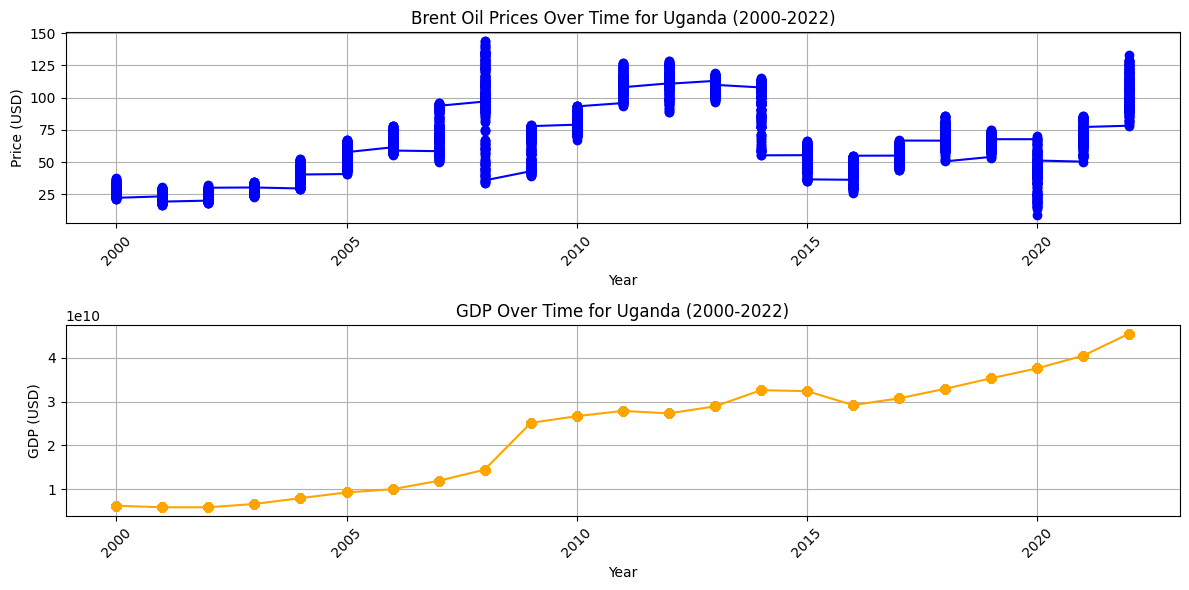

In [76]:
plt.figure(figsize=(12, 6))

# Plotting Brent Oil Prices for Uganda
plt.subplot(2, 1, 1)
plt.plot(uganda_df['Year'], uganda_df['Price'], marker='o', color='blue', label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time for Uganda (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid()

# Plotting GDP for Uganda
plt.subplot(2, 1, 2)
plt.plot(uganda_df['Year'], uganda_df['GDP (USD)'], marker='o', color='orange', label='GDP (USD)')
plt.title('GDP Over Time for Uganda (2000-2022)')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

In [77]:
# Check the columns of uganda_df
print("Columns in uganda_df:")
print(uganda_df.columns)

Columns in uganda_df:
Index(['Date', 'Price', 'Year', 'ID', 'Country', 'Continent', 'Population ',
       'GDP (USD)', 'Country Name', 'Count'],
      dtype='object')


In [78]:
# Correlation analysis for Uganda using the exact column name
correlation_uganda = uganda_df[['Price', 'GDP (USD)', 'Population ']].corr()
print("Correlation for Uganda between Oil Prices, GDP, and Population:")
print(correlation_uganda)

Correlation for Uganda between Oil Prices, GDP, and Population:
                Price  GDP (USD)  Population 
Price        1.000000   0.470602     0.335779
GDP (USD)    0.470602   1.000000     0.952533
Population   0.335779   0.952533     1.000000


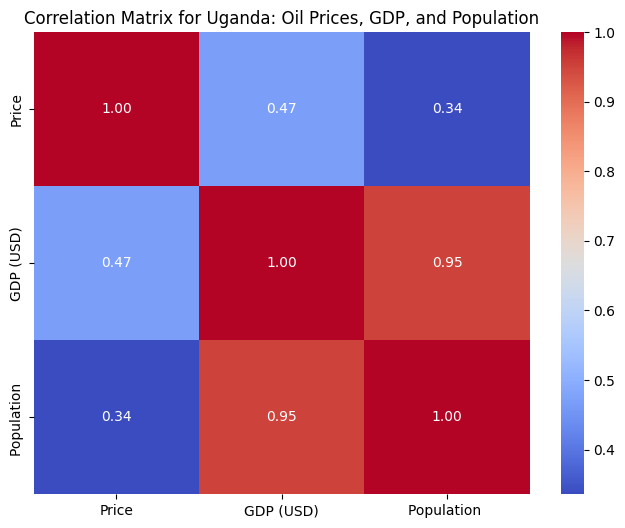

In [79]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_uganda, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Uganda: Oil Prices, GDP, and Population')
plt.show()

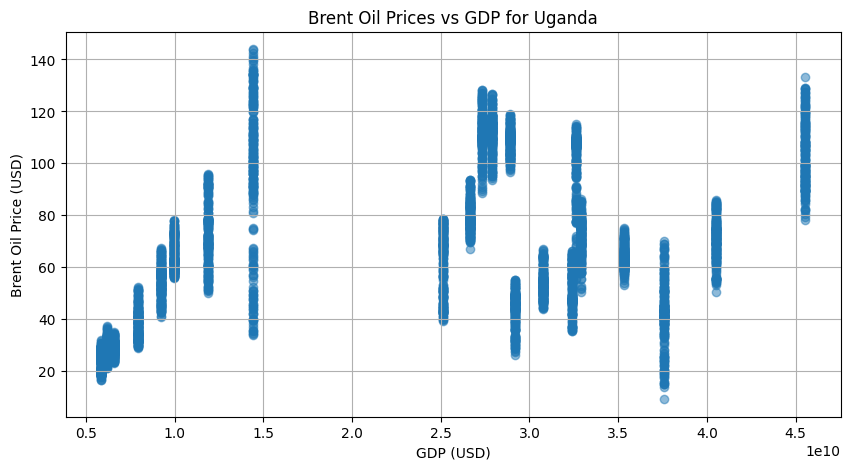

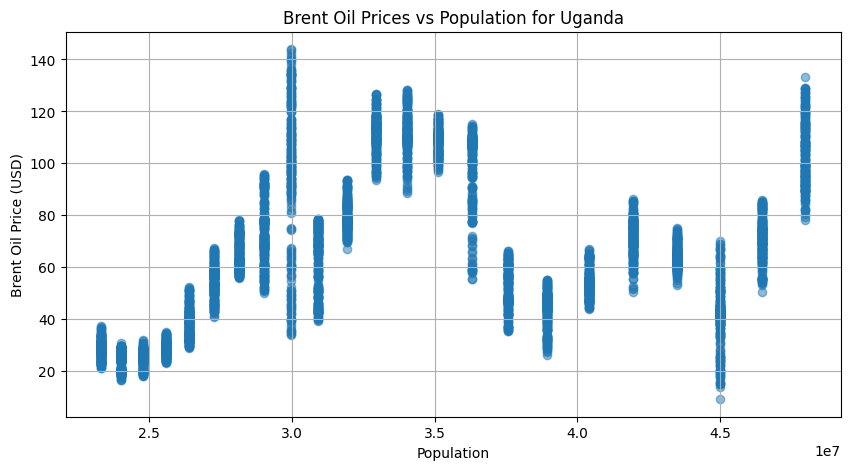

In [80]:
# Scatter plot for Price vs GDP
plt.figure(figsize=(10, 5))
plt.scatter(uganda_df['GDP (USD)'], uganda_df['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs GDP for Uganda')
plt.xlabel('GDP (USD)')
plt.ylabel('Brent Oil Price (USD)')
plt.grid()
plt.show()

# Scatter plot for Price vs Population
plt.figure(figsize=(10, 5))
plt.scatter(uganda_df['Population '], uganda_df['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs Population for Uganda')
plt.xlabel('Population')
plt.ylabel('Brent Oil Price (USD)')
plt.grid()
plt.show()

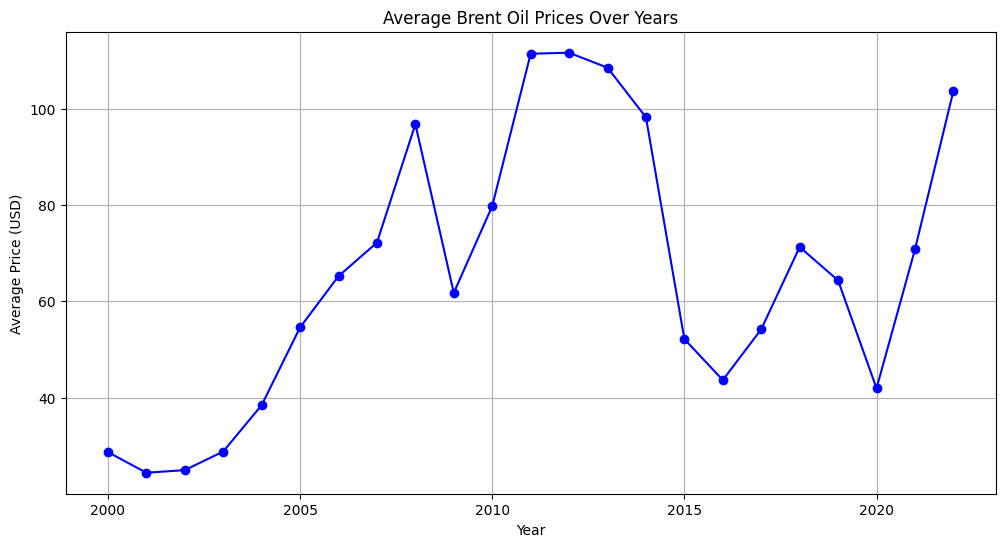

In [81]:
# Group by Year to find average price per year (if necessary)
average_price_per_year = merged_df_cleaned.groupby('Year')['Price'].mean().reset_index()

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Price'], marker='o', color='blue')
plt.title('Average Brent Oil Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid()
plt.show()

In [83]:
print("Columns in the cleaned merged DataFrame:")
print(merged_df_cleaned.columns)

Columns in the cleaned merged DataFrame:
Index(['Date', 'Price', 'Year', 'ID', 'Country', 'Continent', 'Population ',
       'GDP (USD)', 'Country Name', 'Count'],
      dtype='object')


In [84]:
# Trim whitespace from column names
merged_df_cleaned.columns = merged_df_cleaned.columns.str.strip()

# Check the updated column names
print("Updated Columns in the cleaned merged DataFrame:")
print(merged_df_cleaned.columns)

Updated Columns in the cleaned merged DataFrame:
Index(['Date', 'Price', 'Year', 'ID', 'Country', 'Continent', 'Population',
       'GDP (USD)', 'Country Name', 'Count'],
      dtype='object')


In [85]:
from statsmodels.tsa.api import VAR

# Prepare your data for VAR using the corrected column name
var_data = merged_df_cleaned[['Price', 'GDP (USD)', 'Population']].dropna()

# Fit the VAR model
model = VAR(var_data)
results = model.fit(maxlags=5)
print(results.summary())

d:\Week10\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     12:00:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    80.4424
Nobs:                     275491.    HQIC:                   80.4411
Log likelihood:      -1.22530e+07    FPE:                8.60763e+34
AIC:                      80.4405    Det(Omega_mle):     8.60613e+34
--------------------------------------------------------------------
Results for equation Price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.001296         0.001163            1.114           0.265
L1.Price              0.999984         0.001905          524.848           0.000
L1.GDP (USD)         -0.000000         0.000000           -0